
# Methods to optimize the weights of different assets in a portfolio

## Import libraries

In [264]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import random
import math

## Extract data from yahoo finance

In [265]:
tickers = ['AMZN', 'AAPL', 'MSFT']
df = yf.download(tickers, start="2021-02-01", end="2022-02-15", group_by='ticker')
df.head()

[*********************100%***********************]  3 of 3 completed


AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-02-01  162.117996  167.513000  161.751495  167.143997  167.143997   
2021-02-02  169.000000  171.386993  168.056503  169.000000  169.000000   
2021-02-03  171.250504  171.699997  165.431000  165.626495  165.626495   
2021-02-04  166.500000  167.350006  163.887497  166.550003  166.550003   
2021-02-05  165.949997  168.850006  165.135498  167.607498  167.607498   

                             AAPL                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2021-02-01   83204000  133.750000  135.380005  130.929993  134.139999   
2021-02-02  141972000  135.729996  136.309998  134.610001  134.990005   
2021-02-03  141776000  135.759995  135.770004  133.610001  133.940002   
2021-02-04   73414000  136.300003  137.399994  134.589996  137.389999   
2021-02-05   72416000  137.350006  137.419998  135.860001  136.759995   

                                         MSFT                          \
             Adj Close     Volume        Open        High         Low   
Date                                                                    
2021-02-01  132.346756  106239800  235.059998  242.500000  232.429993   
2021-02-02  133.185410   83305400  241.300003  242.309998  238.690002   
2021-02-03  132.149445   89880900  239.570007  245.089996  239.259995   
2021-02-04  135.553314   84183100  242.660004  243.240005  240.369995   
2021-02-05  135.133377   75693800  242.229996  243.279999  240.419998   

                                              
                 Close   Adj Close    Volume  
Date                                          
2021-02-01  239.649994  234.863403  33314200  
2021-02-02  239.509995  234.726166  25916300  
2021-02-03  243.000000  238.146484  27158100  
2021-02-04  242.009995  237.176270  25296100  
2021-02-05  242.199997  237.362442  18054800

In [266]:
portfolio = pd.DataFrame()
for ticker in tickers:
    portfolio[ticker] = df[ticker]['Close']
portfolio.head()

tickers = ['Wa', 'Wb', 'Wc', 'Wd']
portfolio = pd.DataFrame(data=[[199, 108.95, 118.95,199], [227.73, 141.71, 151.71, 170.27],
                          [231.19, 159.41, 169.41, 166.81],[249.07, 156.43, 166.43, 148.93],
                          [272.76, 173.04, 183.04, 125.24],[335.66, 184.57, 194.57, 62.34]],
                          columns=tickers)
portfolio


,Wa,Wb,Wc,Wd
0,199.00,108.95,118.95,199.00
1,227.73,141.71,151.71,170.27
2,231.19,159.41,169.41,166.81
3,249.07,156.43,166.43,148.93
4,272.76,173.04,183.04,125.24
5,335.66,184.57,194.57,62.34


### Replace NaN with the last price

In [267]:
#portfolio.iloc[5]= np.nan

#portfolio.iloc[7,1]= np.nan
#portfolio.iloc[7,2]= np.nan

#portfolio.iloc[3,0]= np.nan
#portfolio.head(10)

In [268]:
portfolio.fillna(method='ffill', inplace=True)
portfolio.head(10)

,Wa,Wb,Wc,Wd
0,199.00,108.95,118.95,199.00
1,227.73,141.71,151.71,170.27
2,231.19,159.41,169.41,166.81
3,249.07,156.43,166.43,148.93
4,272.76,173.04,183.04,125.24
5,335.66,184.57,194.57,62.34


In [269]:
portfolio.isna().sum()

Wa    0
Wb    0
Wc    0
Wd    0
dtype: int64

<Axes: >

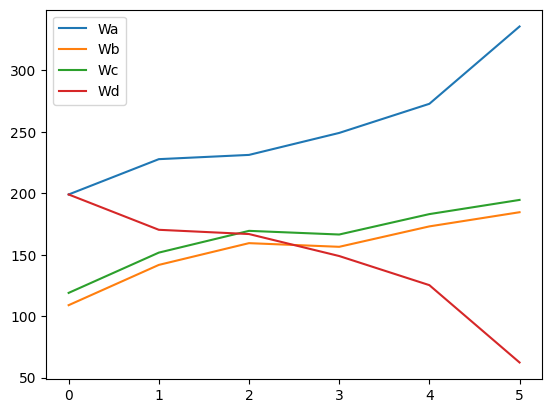

In [270]:
portfolio.plot()

## Arithmethic returns

In [271]:
returns = ((portfolio/portfolio.shift(1))-1)*100
returns.columns = 'R_'+returns.columns
returns.dropna(inplace=True)
returns.head()

,R_Wa,R_Wb,R_Wc,R_Wd
1,14.437186,30.068839,27.540984,-14.437186
2,1.519343,12.490297,11.666996,-2.032067
3,7.733899,-1.869393,-1.759046,-10.718782
4,9.511382,10.618168,9.980172,-15.906802
5,23.060566,6.663199,6.299170,-50.223571


## Expected returns and Covariance matrix

In [272]:
E_Ret = returns.mean()
E_Ret

R_Wa    11.252475
R_Wb    11.594222
R_Wc    10.745655
R_Wd   -18.663681
dtype: float64

In [273]:
Cov_mat = returns.cov()
Cov_mat = Cov_mat.div(100)
Cov_mat

,R_Wa,R_Wb,R_Wc,R_Wd
R_Wa,0.649298,0.102402,0.093369,-1.384586
R_Wb,0.102402,1.371628,1.255361,0.347377
R_Wc,0.093369,1.255361,1.149142,0.312951
R_Wd,-1.384586,0.347377,0.312951,3.403056


## Method 1: Iterative Method

### Creating random weigths for the number of assets

In [274]:
n = 1000000
weights = pd.DataFrame(columns=tickers, index=range(n))
for i in range(n):
    n_weights = []
    LBound = 0
    acum = 0
    for w in range(len(tickers)):
        if w == 0:
            randW = random.randrange(LBound,1000000)/1000000
            LBound = (int)(randW*1000000)
            acum+=randW
            n_weights.append(randW*100)
        elif w == (len(tickers)-1): 
            if LBound==1000000: n_weights.append(0)
            else:
                randW = (1 - acum)
                n_weights.append(randW*100)
                acum+=randW
        else:
            if LBound==1000000: n_weights.append(0)
            else:
                randW = 1-random.randrange(LBound,1000000)/1000000
                LBound += (int)(randW*1000000)
                acum+=randW
                n_weights.append(randW*100)
    weights.iloc[i] = n_weights
weights



,Wa,Wb,Wc,Wd
0,39.9088,14.4563,25.7371,19.8978
1,34.3422,12.4118,17.8913,35.3547
2,3.012,7.3472,11.1203,78.5205
3,30.5538,6.9924,46.9613,15.4925
4,92.1231,2.7364,3.9805,1.16
...,...,...,...,...
999995,99.3289,0.404,0.1438,0.1233
999996,15.4717,45.2955,26.3134,12.9194
999997,98.0749,1.6908,0.1362,0.0981
999998,63.6946,2.4186,3.6012,30.2856


In [275]:
weights.drop_duplicates().shape

(999997, 4)

### Standard desviation of each portfolio

In [276]:
list_desv = []
for i in range(n):
    desv_port = np.matmul(np.asarray(weights.iloc[i].T), np.asarray(Cov_mat))
    desv_port = math.sqrt(np.matmul(desv_port, weights.iloc[i]))
    list_desv.append(desv_port/10)
weights['desv_port'] = list_desv
weights

,Wa,Wb,Wc,Wd,desv_port
0,39.9088,14.4563,25.7371,19.8978,5.472500
1,34.3422,12.4118,17.8913,35.3547,6.080065
2,3.012,7.3472,11.1203,78.5205,14.734924
3,30.5538,6.9924,46.9613,15.4925,6.618352
4,92.1231,2.7364,3.9805,1.16,7.348506
...,...,...,...,...,...
999995,99.3289,0.404,0.1438,0.1233,7.989732
999996,15.4717,45.2955,26.3134,12.9194,8.724154
999997,98.0749,1.6908,0.1362,0.0981,7.911941
999998,63.6946,2.4186,3.6012,30.2856,2.553553


### Expected return of each portolio

In [277]:
list_ret = []
for i in range(weights.shape[0]):
    ret_w = 0
    for j in range(len(weights.iloc[0])-1):
        ret = weights.iloc[i][j]*E_Ret[j]
        ret_w += ret
    list_ret.append(ret_w/100)
weights['ret_port'] = list_ret
weights

,Wa,Wb,Wc,Wd,desv_port,ret_port
0,39.9088,14.4563,25.7371,19.8978,5.472500,5.218781
1,34.3422,12.4118,17.8913,35.3547,6.080065,0.627448
2,3.012,7.3472,11.1203,78.5205,14.734924,-12.269092
3,30.5538,6.9924,46.9613,15.4925,6.618352,6.403602
4,92.1231,2.7364,3.9805,1.16,7.348506,10.894625
...,...,...,...,...,...,...
999995,99.3289,0.404,0.1438,0.1233,7.989732,11.216240
999996,15.4717,45.2955,26.3134,12.9194,8.724154,7.408922
999997,98.0749,1.6908,0.1362,0.0981,7.911941,11.228215
999998,63.6946,2.4186,3.6012,30.2856,2.553553,2.182202


### Min variance Portfolio

In [278]:
weights.sort_values(by='desv_port', axis=0, ascending=True).head(1)

,Wa,Wb,Wc,Wd,desv_port,ret_port
871568,69.5421,0.1131,0.1124,30.2324,2.088347,2.20792


### Max Ratio Sharpe Portfolio

In [279]:
Rf = 1.17
weights['Sharpe_Ratio'] = (weights.ret_port - Rf)/weights.desv_port
weights.sort_values(by='Sharpe_Ratio', axis=0, ascending=False).head(1)

,Wa,Wb,Wc,Wd,desv_port,ret_port,Sharpe_Ratio
577652,66.9257,1.2079,31.8354,0.031,6.768128,11.085981,1.465099
